# **Support Vector Machine(svm)**


**"Support Vector Machine" (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges.we perform classification by finding the hyper-plane that differentiate the two classes.**\
**Types of Kernel**\
**1.Linear Kernel**\
**2.Polynomial Kernel**\
**3.Radial Basis Function kernel (RBF)/ Gaussian Kernel.**


# 1. Import necessary packages

In [66]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


**The use of numpy package is for numerical computations, pandas for reading the files and warnings used for avoiding warnings.**


# 2.Reading the file

In [67]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"


In [68]:
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width','Class']

irisdata = pd.read_csv(url,names=colnames)

### A look at the dataset

In [69]:
irisdata.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Here we have a look at the dataset by using the head function to view the first 5 observations in the data.**

# 3.To identify shape of the dataset

In [70]:
irisdata.shape

(150, 5)

# 4.using describe()

In [71]:
irisdata.describe()


,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**We use the describe() function it gives the summary statistics of the Iris data.**

# 5.Using info()

In [72]:
irisdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
Class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


**info() function gives the length of the columns,data type and also specifies if our dataset has any missing values or not.**

# 6.correlation()

In [73]:
correlation=irisdata.corr()

In [74]:
correlation

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


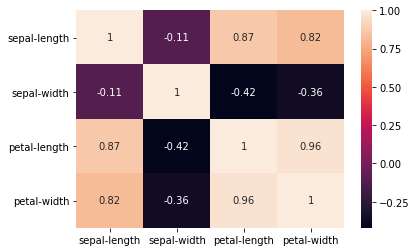

In [75]:
import seaborn as sns
sns.heatmap(correlation,annot=True)

**Visualizing the correlation using heat map function from the seaborn package.**

# 7.Pairplot()

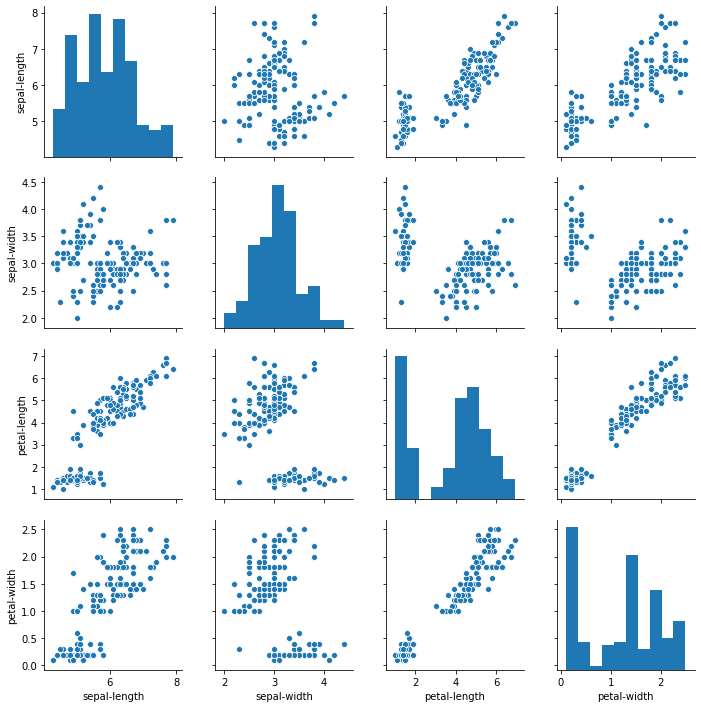

In [92]:
sns.pairplot(irisdata)


**Pair plots are used to visualize the relation between each and every column of the data with each and every other column in the form of scatter plots and histograms.**

# 8.Barplots()

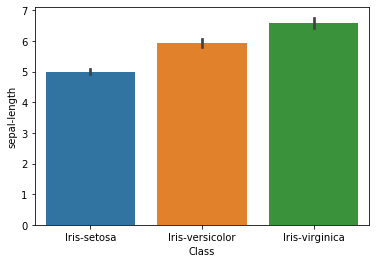

In [76]:
sns.barplot(x="Class",y="sepal-length",data=irisdata)

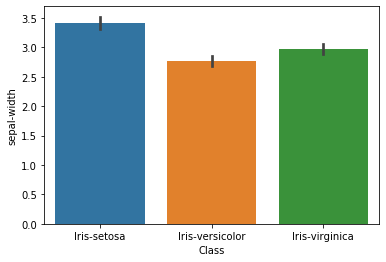

In [77]:
sns.barplot(x="Class",y="sepal-width",data=irisdata)

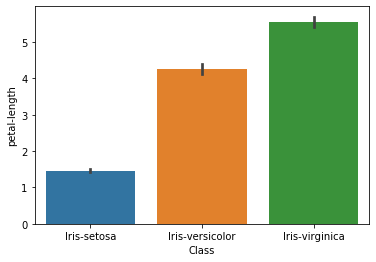

In [78]:
sns.barplot(x="Class",y="petal-length",data=irisdata)

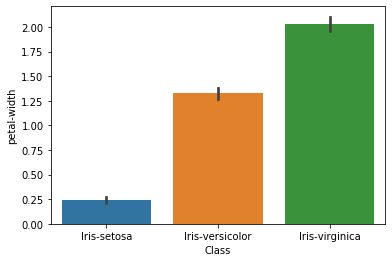

In [79]:
sns.barplot(x="Class",y="petal-width",data=irisdata)

# 9.We specify the location of x and y variables

In [80]:
x = irisdata.drop('Class', axis=1)
y = irisdata['Class']

In [81]:
print(x.shape)
print(y.shape)

(150, 4)
(150,)


**We split the data into x and y variables and view their shape using shape function.**

# 10.Split the Iris data into Training and Testing data.

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)


**To train the model we split the data into training and testing data using train_test_split function of model_selection module in the ratio 80:20.**

# 11.(a) Fit the svc model by using Polynomial kernel

In [42]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(x_train, y_train)

y_pred = svclassifier.predict(x_test)


In [22]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 11  0]
 [ 0  1  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



**We fit the svc function with poly kernel and predict with new data(x_test) and print the confusion matrix,classification report of the fitted model.**

In [43]:
from sklearn.model_selection import cross_val_score

data1=cross_val_score(svclassifier,x_train,y_train,cv=5)
data1

array([0.96      , 0.95833333, 0.91666667, 0.875     , 0.95652174])

In [24]:
data1.mean()

0.933304347826087

**To verify the model reliability we use cross validation to obtain the average accuracy of the model(93.33%) when new data is fit to it.**

# (b) Fit the svc model by using rbf kernel

In [44]:
svclassifier2 = SVC(kernel='rbf')
svclassifier2.fit(x_train, y_train)
y_pred = svclassifier2.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 11  0]
 [ 0  1  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



**We fit the svc function with rbf kernel and predict with new data(x_test) and print the confusion matrix,classification report of the fitted model.**

In [45]:
from sklearn.model_selection import cross_val_score

data2=cross_val_score(svclassifier2,x_train,y_train,cv=5)
data2

array([1.        , 0.95833333, 0.95833333, 0.95833333, 1.        ])

In [37]:
data2.mean()

0.975

**To verify the model reliability we use cross validation to obtain the average accuracy of the model(97.5%) when new data is fit to it.**

# (c) Fit the svc model by using Sigmoid kernel

In [46]:
svclassifier3 = SVC(kernel='sigmoid')
svclassifier3.fit(x_train, y_train)
y_pred = svclassifier3.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  0 10]
 [ 0  0 11]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        10
Iris-versicolor       0.00      0.00      0.00        11
 Iris-virginica       0.30      1.00      0.46         9

       accuracy                           0.30        30
      macro avg       0.10      0.33      0.15        30
   weighted avg       0.09      0.30      0.14        30



**We fit the svc function with sigmoid and predict with new data(x_test) and print the confusion matrix,classification report of the fitted model.**

In [87]:
from sklearn.model_selection import cross_val_score

data3=cross_val_score(svclassifier3,x_train,y_train,cv=5)
data3

array([0.        , 0.08333333, 0.04166667, 0.125     , 0.33333333])

In [34]:
data3.mean()

0.3415652173913043

**To verify the model reliability we use cross validation to obtain the average accuracy of the model(34%) when new data is fit to it.**

# (d) Fit the svc model by using Linear kernel

In [83]:
svclassifier4 = SVC(kernel='linear')
svclassifier4.fit(x_train, y_train)
y_pred = svclassifier4.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



**We fit the svc function with linear kernel and predict with new data(x_test) and print the confusion matrix,classification report of the fitted model.**

In [84]:
from sklearn.model_selection import cross_val_score

data4=cross_val_score(svclassifier4,x_train,y_train,cv=5)
data4

array([1.        , 0.91666667, 1.        , 1.        , 0.95833333])

In [85]:
data4.mean()

0.975

**To verify the model reliability we use cross validation to obtain the average accuracy of the model(97.5%) when new data is fit to it.**

# 12.Testing with new observation whose actual class is Iris-setosa.

In [38]:
new_observation = [5.1,3.5,1.4,0.2]
y_pred = svclassifier.predict([new_observation])
print('predicted class value is ', y_pred)

predicted class value is  ['Iris-setosa']


In [39]:
new_observation = [5.0,3.4,1.6,0.4]
y_pred = svclassifier2.predict([new_observation])
print('predicted class value is ', y_pred)

predicted class value is  ['Iris-setosa']


In [40]:
new_observation = [5.0,3.4,1.6,0.4]
y_pred = svclassifier3.predict([new_observation])
print('predicted class value is ', y_pred)

predicted class value is  ['Iris-virginica']


In [53]:
new_observation = [5.0,3.4,1.6,0.4]
y_pred = svclassifier4.predict([new_observation])
print('predicted class value is ', y_pred)

predicted class value is  ['Iris-setosa']


**We find that all models have classified the new observation correctly to the class Iris-setosa except the model with sigmoid kernel which classified it as Iris-virginica as it had very low accuracy(34%) compared to other models.**